# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task )-Data Analysis and Visualization.ipynb*
  2. For example: *DCA1-Data Analysis and Visualization.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


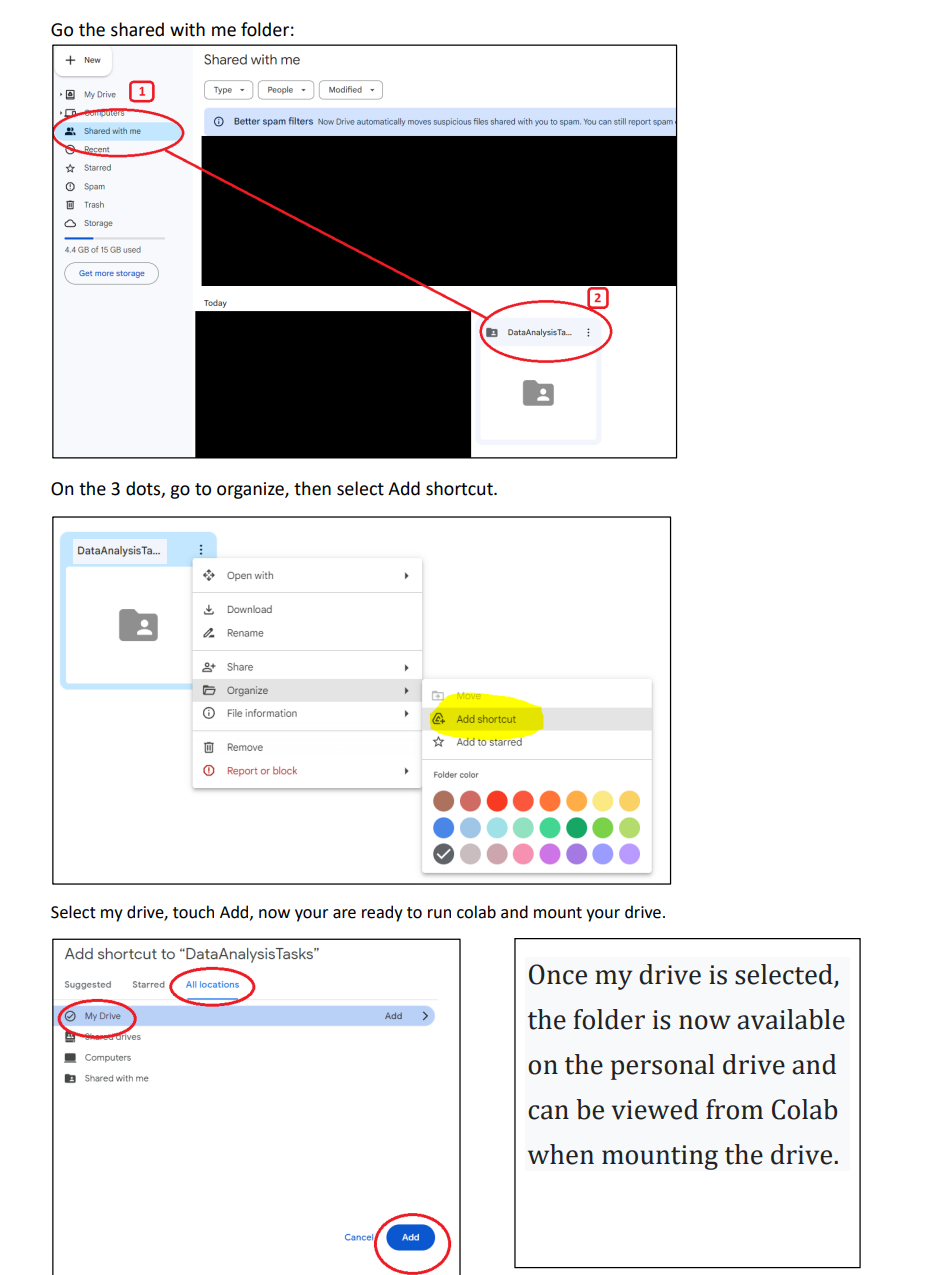

In [1]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/Automobile.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now




---



**AFTER THIS POINT YOU CAN START WORKING**

---








From the dataset "popular_video_games.csv" I want 2 functions, one that converts the values of the columns 'Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist' to numeric values, and another function that extracts only the year from the column 'Release Date'. Then, calculate per year, the average of the columns 'Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist' and then in the same plot make a bar chart for the top 5 of each column 'Total Games', 'Avg Listed', 'Avg Review', 'Avg Plays', 'Avg Playing', 'Avg Backlogs', 'Avg Wishlist'. I want the bars to be teal and the background of the figure to be cornflowerblue and the x-axis ticks to be rotated 45 degrees. Include the code in the answer.

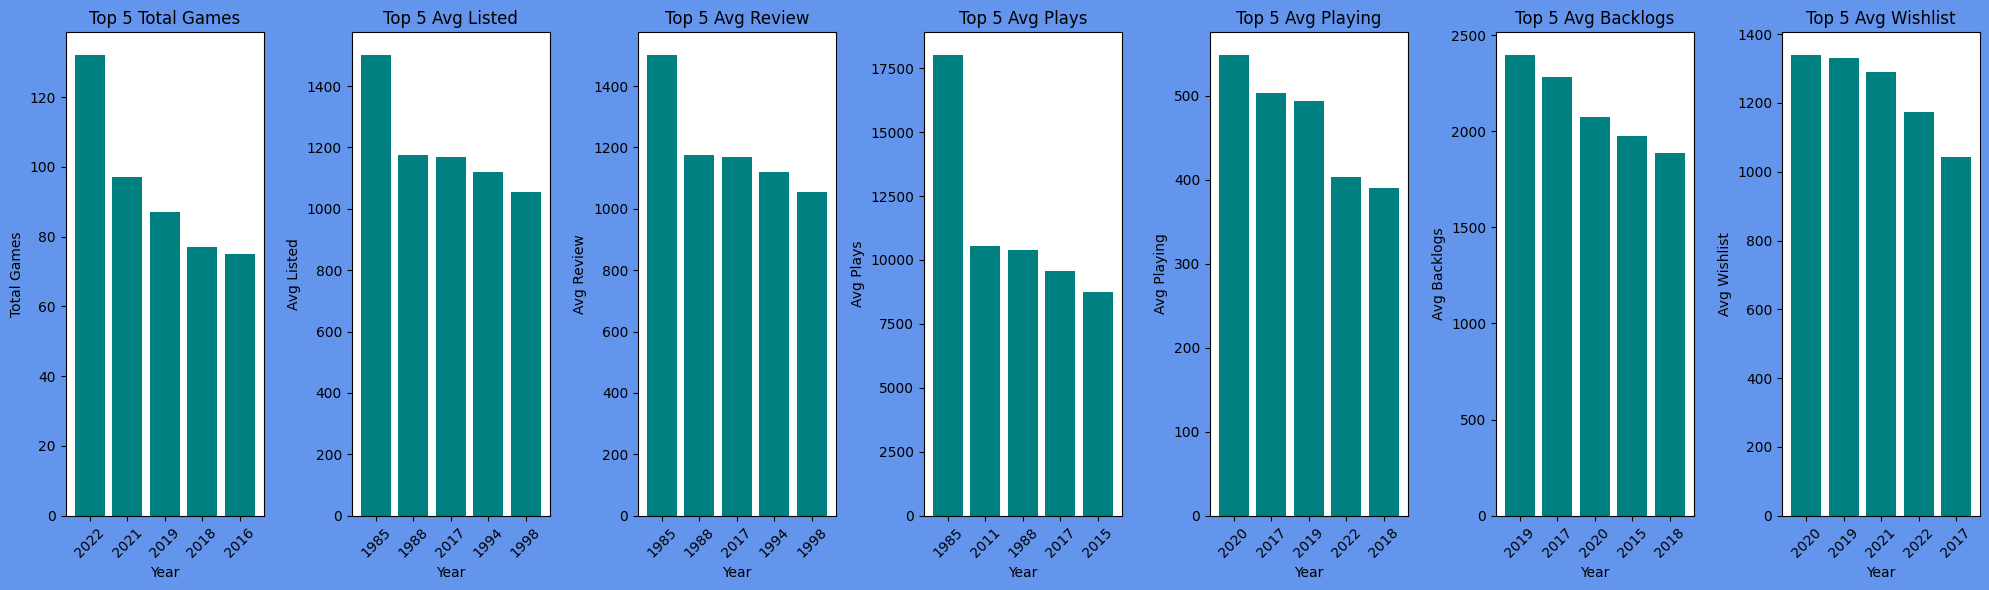

In [6]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the workout data from the CSV file and load it into a pandas dataframe
df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/popular_video_games.csv")

def convert_values(values):
    """
    Converts the input values to numerical format. If the value ends with 'K', it's converted to thousands.

    Args:
    values (str): The input value, either in standard numerical format or with 'K' (e.g., '3.5', '120K').

    Returns:
    float: The converted numerical value.
    """
    if values.endswith('K'):
        # If the value ends with 'K', convert the value to a float and multiply by 1000 to represent thousands.
        converted_values = float(values[:-1]) * 1000
    else:
        # If the value doesn't end with 'K', directly convert it to a float.
        converted_values = float(values)
    return converted_values

def extract_year(date_str):
    """
    Extracts the last 4 characters from a given string.

    Args:
        date_str (str): The input string from which the last 4 characters will be extracted.

    Returns:
        str or None: The last 4 characters of the input string, or None if the input is not a string
                     or has a length less than 4.
    """
    if isinstance(date_str, str) and len(date_str) >= 4:
        return date_str[-4:]
    else:
        return None


# List of column names for which we want to apply the value conversion
desired_columns = ['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']

# Apply the 'convert_values' function to each cell in the desired columns of the DataFrame 'df'
df[desired_columns] = df[desired_columns].applymap(convert_values)

# Apply the function 'extract_year' to the 'Release Date' column
df['Year'] = df['Release Date'].apply(extract_year)

# Calculate the number of games per year
games_per_year = df['Year'].value_counts().sort_index()

# Calculate the average of the columns for each year
average_columns = df.groupby('Year')[['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']].mean()

# Save the information in a pandas dataframe
data = []

for year, count in games_per_year.items():
    avg_listed = average_columns[average_columns.index == year]['Times Listed'].item()
    avg_review = average_columns[average_columns.index == year]['Number of Reviews'].item()
    avg_plays = average_columns[average_columns.index == year]['Plays'].item()
    avg_playing = average_columns[average_columns.index == year]['Playing'].item()
    avg_backlogs = average_columns[average_columns.index == year]['Backlogs'].item()
    avg_wishlist = average_columns[average_columns.index == year]['Wishlist'].item()

    data.append({
        'Year': year,
        'Total Games': count,
        'Avg Listed': avg_listed,
        'Avg Review': avg_review,
        'Avg Plays': avg_plays,
        'Avg Playing': avg_playing,
        'Avg Backlogs': avg_backlogs,
        'Avg Wishlist': avg_wishlist
    })

df_avg_per_year = pd.DataFrame(data)

# Select the columns to plot (top 5)
top_columns = ['Total Games', 'Avg Listed', 'Avg Review', 'Avg Plays', 'Avg Playing', 'Avg Backlogs', 'Avg Wishlist']

# Configure subplots
fig, axs = plt.subplots(nrows=1, ncols=len(top_columns), figsize=(20, 6))

# Set the background color
fig.patch.set_facecolor('cornflowerblue')

# Create bar graphs per each column
for i, column in enumerate(top_columns):
    df_sorted = df_avg_per_year.sort_values(by=column, ascending=False).head(5)
    axs[i].bar(df_sorted['Year'], df_sorted[column], color = 'teal')
    axs[i].set_title(f"Top 5 {column}")
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel(column)
    axs[i].set_xticks(df_sorted['Year'])
    axs[i].set_xticklabels(df_sorted['Year'], rotation=45)

# Show plot
plt.tight_layout()
plt.show()

**RESPONSE MODEL**

Sure! here is the code that writes 2 functions, one that converts the values of the columns 'Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist' to numeric values, and another function that extracts only the year from the column 'Release Date'. Then, it calculates per year, the average of the columns 'Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist' and stores this information in a pandas dataframe named df_avg_per_yea and that plots in the same plot a bar chart for the top 5 of each column 'Total Games', 'Avg Listed', 'Avg Review', 'Avg Plays', 'Avg Playing', 'Avg Backlogs', 'Avg Wishlist' with the bars in teal color and the background of the figure in cornflowerblue color and with the x-axis ticks rotated 45 degrees:

[CODE]

This code creates the image:

[image of the query]

I hope this is helpful!